# 1) Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 2) Data Loading

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     284807 non-nu

# 3) Exploratory Data Analysis

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(1081)

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(283726, 31)

In [8]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
correlation_matrix = df.corr()
correlation_matrix['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64

# 4) Data Preprocessing

In [18]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (226980, 30)
X_test shape: (56746, 30)
y_train shape: (226980,)
y_test shape: (56746,)


# 5) Model Training and Evaluation

$ a) BernoulliNB $

In [19]:
bernoulli_model = BernoulliNB()
bernoulli_model.fit(X_train_scaled, y_train)
y_pred_bernoulli = bernoulli_model.predict(X_test_scaled)
print("BernoulliNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bernoulli))
print("\nBernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bernoulli))
print("\nBernoulliNB Precision:", precision_score(y_test, y_pred_bernoulli, average=None))
print("\nBernoulliNB Recall:", recall_score(y_test, y_pred_bernoulli, average=None))
print("\nBernoulliNB F1 Score:", f1_score(y_test, y_pred_bernoulli, average=None))

BernoulliNB Confusion Matrix:
 [[56641    10]
 [   41    54]]

BernoulliNB Accuracy: 0.9991012582384662

BernoulliNB Precision: [0.99927667 0.84375   ]

BernoulliNB Recall: [0.99982348 0.56842105]

BernoulliNB F1 Score: [0.99955    0.67924528]


In [20]:
bernoulli_cross_val_scores = cross_val_score(bernoulli_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("BernoulliNB Cross-Validation Accuracy Scores:\n", bernoulli_cross_val_scores)

BernoulliNB Cross-Validation Accuracy Scores:
 [0.99903075 0.99903075 0.99920698 0.99922901 0.99931712]


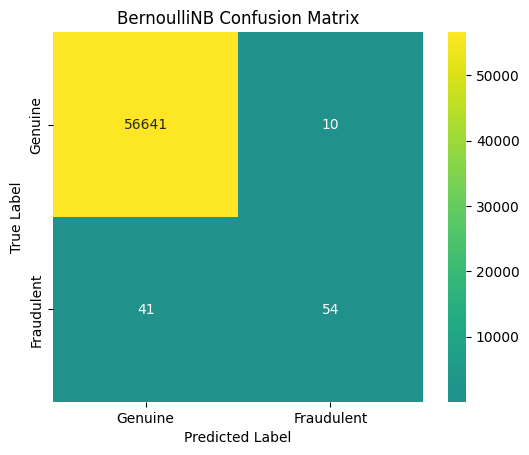

In [23]:
sns.heatmap(confusion_matrix(y_test, y_pred_bernoulli), annot = True, cmap = 'viridis', center= 0 , square = True, fmt = 'd',
            xticklabels=['Genuine', 'Fraudulent'],
            yticklabels=['Genuine', 'Fraudulent'])
plt.title('BernoulliNB Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [24]:
gaussian_model = GaussianNB()
gaussian_model.fit(X_train_scaled, y_train)
y_pred_gaussian = gaussian_model.predict(X_test_scaled)
print("GaussianNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gaussian))
print("\nGaussianNB Accuracy:", accuracy_score(y_test, y_pred_gaussian))
print("\nGaussianNB Precision:", precision_score(y_test, y_pred_gaussian, average=None))
print("\nGaussianNB Recall:", recall_score(y_test, y_pred_gaussian, average=None))
print("\nGaussianNB F1 Score:", f1_score(y_test, y_pred_gaussian, average=None))

GaussianNB Confusion Matrix:
 [[55395  1256]
 [   18    77]]

GaussianNB Accuracy: 0.9775490783491347

GaussianNB Precision: [0.99967517 0.05776444]

GaussianNB Recall: [0.97782916 0.81052632]

GaussianNB F1 Score: [0.9886315  0.10784314]


In [25]:
gaussian_cross_val_scores = cross_val_score(gaussian_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("GaussianNB Cross-Validation Accuracy Scores:\n", gaussian_cross_val_scores)

GaussianNB Cross-Validation Accuracy Scores:
 [0.9776412  0.977487   0.97885276 0.97830205 0.97766323]


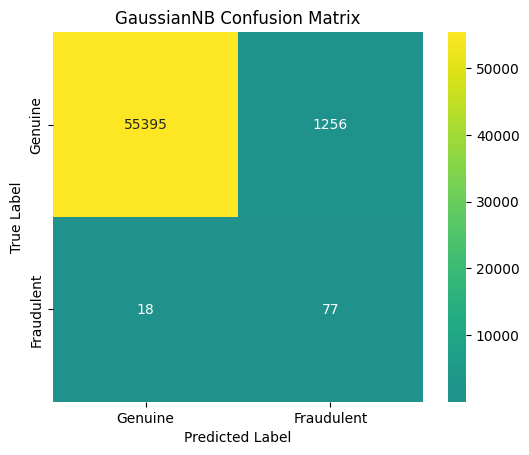

In [27]:
sns.heatmap(confusion_matrix(y_test, y_pred_gaussian), annot = True, cmap = 'viridis', center= 0 , square = True, fmt = 'd',
            xticklabels=['Genuine', 'Fraudulent'],
            yticklabels=['Genuine', 'Fraudulent'])
plt.title('GaussianNB Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [28]:
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg_model.predict(X_test_scaled)
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nLogistic Regression Precision:", precision_score(y_test, y_pred_log_reg, average=None))
print("\nLogistic Regression Recall:", recall_score(y_test, y_pred_log_reg, average=None))
print("\nLogistic Regression F1 Score:", f1_score(y_test, y_pred_log_reg, average=None))

Logistic Regression Confusion Matrix:
 [[56641    10]
 [   40    55]]

Logistic Regression Accuracy: 0.9991188806259472

Logistic Regression Precision: [0.9992943  0.84615385]

Logistic Regression Recall: [0.99982348 0.57894737]

Logistic Regression F1 Score: [0.99955882 0.6875    ]


In [29]:
log_reg_cross_val_scores = cross_val_score(log_reg_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Accuracy Scores:\n", log_reg_cross_val_scores)

Logistic Regression Cross-Validation Accuracy Scores:
 [0.99911887 0.99916292 0.99916292 0.99914089 0.99931712]


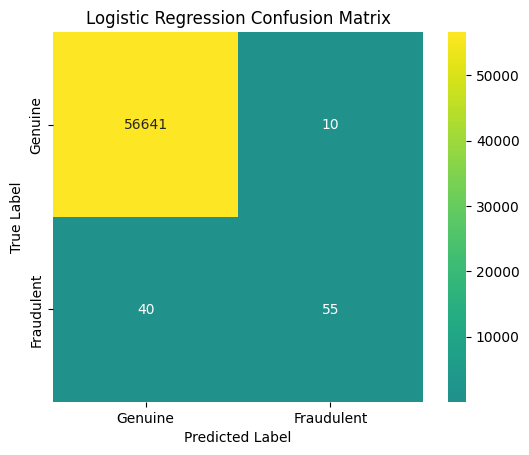

In [33]:
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot = True, cmap = 'viridis', center= 0 , square = True, fmt = 'd',
            xticklabels=['Genuine', 'Fraudulent'],
            yticklabels=['Genuine', 'Fraudulent'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/tmp/ipykernel_1035/1887465503.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = ['BernoulliNB', 'GaussianNB', 'Logistic Regression'],


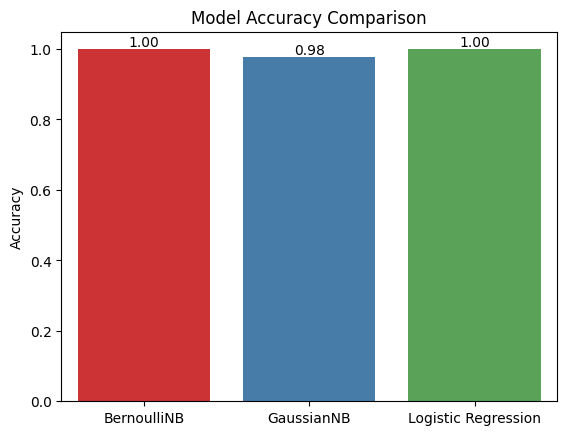

In [31]:
ax = sns.barplot(x = ['BernoulliNB', 'GaussianNB', 'Logistic Regression'],
            y = [accuracy_score(y_test, y_pred_bernoulli),
                 accuracy_score(y_test, y_pred_gaussian),
                 accuracy_score(y_test, y_pred_log_reg)], palette='Set1')
for container in ax.containers:
     ax.bar_label(container, fmt='%.2f')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

Both BernoulliNB and Logistic Regression performes good